# __Trabalho FINAL (ATP 2021)__

In [1]:
#Função que cria um registo na bd, com os campos #title","year","cast","genres","id"
def criarRegisto(t, y, c, g,i):
    return {
        'title': t,
        'year': y, 
        'cast': c, 
        'genres': g, 
        'id': i
    }

In [2]:
import json 
#Função com o objetivo de ler o ficheiro em json e adicionar cada um dos elementos (no caso filmes) a uma lista
def lerDataset(fnome):  
    f = open(fnome, encoding="utf-8") #Abre o ficheiro json
    bd = json.load(f) #Retorna o ficheiro json como um dicionário
    i=0
    for e in bd: #Para cada filme adiciona um índice
        e["id"]="e"+str(i)
        i+=1
    return bd

Filmes = [] #Lista de dicionários em que cada dicionário corresponde a um filme do ficheiro json com a diretoria: "../Projeto Final/cinemaATP.json"
Filmes = lerDataset("../Projeto Final/cinemaATP.json")



In [3]:
def gravarBD(bd,fnome): #O JSON permite guardar dados com qualquer tipo de dimensões (a nossa bd tem 5 dimensões)
    f=open(fnome,"w",encoding="utf-8") #Vai abrir e escrever no ficheiro
    json.dump(bd,f) #Para escrever no ficheiro json
    f.close()
    return
    

In [4]:
gravarBD(Filmes,"../Projeto Final/cinemaATP.json") #Atualizar o dataset

In [5]:
def carregarBD(fnome): #Output da informação processada pela função gravarBD
    f=open(fnome,"r",encoding="utf-8")#Ler o ficheiro 
    bd=json.load(f) #Para carregar o ficheiro json
    return bd
Filmes=carregarBD("../Projeto Final/cinemaATP.json")

In [6]:
def inserirReg(bd, reg): #Vai inserir um novo filme na bd
    bd.append(reg) #Fazer um append do novo filme na bd
    return bd

In [7]:
def extraiCast(lcast): #Limpar e processar a informação
    res="" #Separador
    i=1 
    for ator in lcast: #Para cada ator do filme, entre eles acrescentamos um ";" e um espaço
        res= res + ator
        if (i<len(lcast)):
            res=res+" ; "            
        i+=1
    return res    

def extraiGenre(lgenre): #Faz o mesmo processamento de informação que o "extraiCast", mas para os géneros
    res2=""
    i=1 
    for genero in lgenre:
        res2= res2 + genero
        if (i<len(lgenre)):
            res2=res2+" ; "            
        i+=1
    return res2    
   

def guardarBD(bd, fnome):
    sep= "::"  #Separador
    sepFilme="\n" #Vai pôr um filme por linha
    f=open(fnome,"w", encoding="utf-8") #Abre o ficheiro em modo escrita
    for filme in bd: #Modo como a informação vai ser guardada
        #ID-... :: Title-... :: Year-... :: Cast- ... ; ... (consoante o processamento definido na função extraiCast) :: Genres-... ; ... (consoante o processamento definido na função extraiGenres) (passa para a linha seguinte)
        f.write("ID- "+filme["id"]+sep+"Title- "+filme["title"]+sep+"Year- "+str(filme['year'])+sep+"Cast- "+extraiCast(filme['cast'])+sep+"Genres- "+extraiGenre(filme["genres"])+sepFilme)
    f.close() #Termina a leitura do ficheiro
    return

    
    
    
    

In [8]:
guardarBD(Filmes,"ListaFilmes.txt")

In [9]:
    
def consultarNome(bd,title): #Função que consulta na bd o filme pelo Título
    ltitles=[] #Lista vazia aonde vão ser adicionados todos os títulos de filmes com a palavra procurada ou o título completo
    for e in bd: #Percorre cada filme da bd para adicionar à lista
        palavras=e["title"].split() # serve para separar cada palavra do titulo
        encontrado=False 
        for i in range (len(palavras)): #percorre cada palavra do titulo 
            #1ªcondição: procurar uma palavra do título; 2ªcondição: procurar o título completo
            if ((palavras[i].lower()==title.lower()) or (e["title"].lower()==title.lower() and encontrado== False)):   # se encontrar a palavra escolhida num título da bd pára ou então se encontrar o título pretendido na BD 
                ltitles.append(e["title"]) # mostra todos os titulos que contenham essa palavra 
                ltitles.append(e["genres"]) # e os seus generos correspondentes
                encontrado= True #pára a procura do filme uma vez já foi encontrado
    
    return ltitles
                

In [10]:
def consultarID(bd,id): # função que nos permite consultar os filmes da bd por id
    lid=[]   # lista vazia  onde vão ser adicionado o filme e o genero correspondente a esse id
    for e in bd:
        if(e["id"]==id):
             lid.append(e["title"])
             lid.append(e["genres"])
    return (lid)
    

In [11]:
def ordenarNome(bd): #Retorna a bd ordenada por ordem alfabética relativamente ao título
    return(sorted(bd,key=lambda entrada:entrada["title"])) 

In [12]:
 def calcEntradas(bd):  # função que contem o conteudo da listbox correspondente ao botão "carregar"
    lista=[]  # lista vazia onde vai ser adicionado o titulo, o genero, e o cast
    for e in bd:  # ciclo que percorre cada filme da bd 
        lista.append("Title: "+e["title"]+";") 
        strGenre=" | ".join(e["genres"]) # transforma a lista genero numa string e cada elemento dessa lista é separado por "|"
        lista.append("Genres: "+strGenre)
        strCast= "; ".join(e["cast"])
        lista.append("Cast: "+strCast) #mesmo raciocinio do genero
        lista.append("--//--") # serve para separar os filmes
    return lista


In [13]:
def calcListaGenres(bd): #Função que retorna uma lista com todos os géneros de filmes na BD
    listGen=[]
    for e in bd:
        for g in e["genres"]: #Vai percorrer cada género que existe no campo dos genres e se ele não existir na listGen vai adicioná-lo
            if g.lower() not in listGen:
                listGen.append(g.lower())
    listGen.sort() #Vai ordenar os géneros por ordem alfabética
    return listGen

def calcListaFilmes(bd,g): #Função que retorna uma lista de todos os filmes de um dado género
    listFilmes=[]
    listaGeneros=calcListaGenres(bd)
    for e in bd:
        if ((g in listaGeneros) and (g.lower() in str(e["genres"]).lower())): #Vai percorrer o campo "genres" e adicionar os filmes que sejam desse género
            listFilmes.append(e["title"])
    return listFilmes

def ordenarGenres(bd,g): #Função que retorna uma lista de um dicionario com todos os filmes de um determinado género
    ordemGenre=[]
    listaGeneros=calcListaGenres(bd) #lista composta por todos os géneros
    for genre in listaGeneros:# Para cada género existente na listaGeneros, se o género pretendido corresponder a algum existente na listaGeneros,vai nos ser dado um output de uma lista "ordemGenres"  de um dicionário que contenha o género e todos os filmes correspondentes ao mesmo 
        if(g.lower()==genre):
            ordemGenre.append({"Genre":g,"Filmes":calcListaFilmes(bd,g.lower())})
    return ordemGenre




In [14]:
def numGeneros(bd): #Função que retorna o nº de filmes que cada género tem
    listageneros=[]
    listGen=calcListaGenres(bd) #lista composta por todos os géneros
    for g in listGen: #Vai percorrer cada género da lista
        listageneros.append((g,len(calcListaFilmes(bd,g)))) #Vai ser adicionado à lista tuplos que têm um par:(género,nºde filmes correspondente ao género) 
    return listageneros

In [15]:
ListGen=numGeneros(Filmes)

In [16]:
def calcListaCast(bd):#Função que retorna uma lista com todos os atores existentes na BD
    listCas=[]
    for e in bd:
        for a in e["cast"]:#Vai percorrer cada ator que existe no campo cast e se ele não existir na listCas vai adicioná-lo
            if a.lower() not in listCas:
                listCas.append(a.lower())
    listCas.sort()
    return listCas

def calcListaFilmes2(bd,a): #Função que retorna uma lista de todos os filmes de um dado ator
    listFilmes2=[]
    listCas=calcListaCast(bd)
    for e in bd:
        if ((a in listCas) and (a.lower() in str(e["cast"]).lower())): #Vai percorrer o campo "cast" e adicionar os filmes que sejam desse ator
            listFilmes2.append(e["title"])
    return listFilmes2

def ordenarCas(bd,a): #Função que retorna uma lista de um dicionario com todos os filmes de um determinado ator
    ordemCast=[]
    listaCast=calcListaCast(bd)
    for ator in listaCast:
        if(a.lower()==ator):
            ordemCast.append({"Cast":a,"Filmes":calcListaFilmes2(bd,a.lower())})
    return ordemCast




In [17]:
def cast(bd):#Função que retorna uma lista com todos os atores existentes na BD
    listCas=[]
    for e in bd:
        for a in e["cast"]:#Vai percorrer cada ator que existe no campo cast e se ele não existir na listCas vai adicioná-lo
            if a not in listCas:
                listCas.append(a)
    listCas.sort()
    return listCas
                
def cast2(bd,a):
    listFilmes2=[]
    for e in bd:
        if (a in e["cast"]): #Vai percorrer o campo "cast" e adicionar os filmes que sejam desse ator
            listFilmes2.append(e["title"])
    return(listFilmes2)


In [18]:
listcast=cast(Filmes)

In [19]:
def top10atores(bd): #Função que retorna os 10 atores com mais filmes!
    atorfilmes=[]
    top10=[]
    #lista com todos os atores na bd
    for a in listcast:
        #Como existia no campo "cast", atores com o nome "and", fizemos com que o nosso ciclo for apenas corresse com nome diferente deste
        if(a!="and"): #pois existe em vários filmes "and" que torna errado o top10 de atores com mais filmes
            atorfilmes.append((a,len(cast2(bd,a))))
            atorfilmes.sort(key=lambda entrada:entrada[1]) #lista ordenada por número de filmes e reverse para ficar na ordem decrescente
            atorfilmes.reverse()

    n=0
    while(n<10): #Vai fazer append na lista top10 dos 10 primeiros atores da lista atorfilmes 
        top10.append(atorfilmes[n]) 
        n+=1
    return(top10)

In [20]:
Top10=top10atores(Filmes)

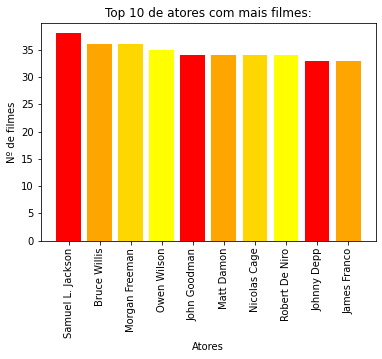

In [21]:
import matplotlib.pyplot as plt

def plottop10atores(top): #Função que faz o gráfico dos 10 atores com mais filmes na BD
    atores=[]
    nfilmes=[]
    for i in range (len(top)): #Vai percorrer cada tuplo da lista top10 e vai separar os atores e o seu nº de filmes
        atores.append(top[i][0])
        nfilmes.append(top[i][1])
    plt.bar(atores,nfilmes,color=['red', 'orange', 'gold','yellow'])
    plt.xlabel("Atores")
    plt.ylabel("Nº de filmes")
    plt.title("Top 10 de atores com mais filmes:")
    plt.xticks(rotation=90)
    plt.savefig("plotatores.png",dpi=180,bbox_inches="tight") #Guarda o gráfico numa imagem png
    plt.show()
plottop10atores(Top10)

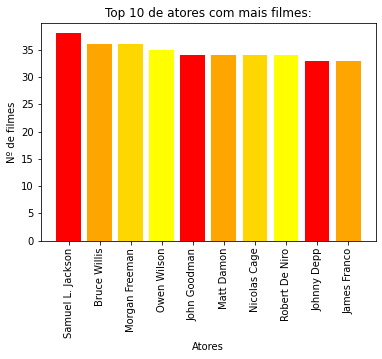

In [22]:
from PIL import Image
def ima2(): #Função que cria uma janela com a imagem
    plottop10atores(Top10)
    im = Image.open("plotatores.png")
    im.show()
ima2()

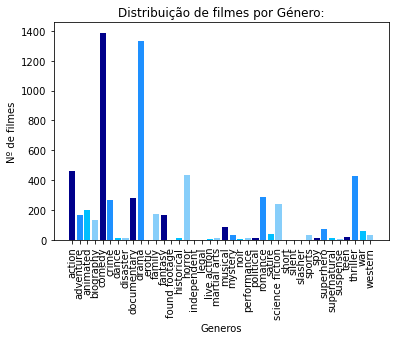

In [23]:
import matplotlib.pyplot as plt

def plotgeneros(gen):#Função que faz o gráfico do nº de filmes em função do nº de géneros.
    generos=[]
    nfilmes=[]
    for i in range (len(gen)): #Vai percorrer cada tuplo da lista gen e vai separar os géneros e o seu nº de filmes
        generos.append(gen[i][0])
        nfilmes.append(gen[i][1])
    
    plt.bar(generos,nfilmes,color=["darkblue",'dodgerblue','deepskyblue','lightskyblue'])
    plt.xlabel("Generos")
    plt.ylabel("Nº de filmes")
    plt.title("Distribuição de filmes por Género:")
    plt.xticks(rotation=90)
    plt.savefig("plot.png",dpi=180,bbox_inches="tight")
    plt.show()
plotgeneros(ListGen)

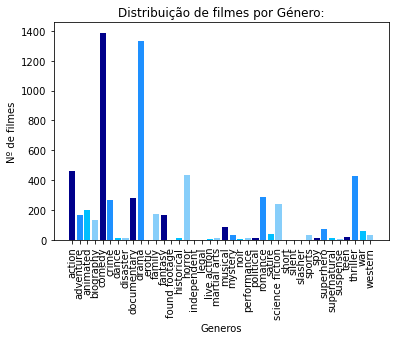

In [24]:
from PIL import Image
def ima():
    #read the image
    plotgeneros(ListGen)
    im = Image.open("plot.png")

    #show image
    im.show()
ima()

In [43]:
import PySimpleGUI as sg

sg.SetOptions(background_color='#9FB8AD',
       text_element_background_color='#9FB8AD',
       element_background_color='#9FB8AD',
       scrollbar_color=None,
       input_elements_background_color='#F7F3EC',
       progress_meter_color = ('green', 'blue'),
       button_color=('white','#475841'))

Myfilms=[]

menu_list_column = [[sg.Text("   BiblioFilmes!")], [sg.Text(" ")],
    [sg.Button("Limpar",size=(11,0))],
    [sg.Button("Carregar",size=(11,0))],
    [sg.Button("Gravar",size=(11,0))],
    [sg.Button("Inserir",size=(11,0))],
    [sg.Button("Consultar",size=(11,0))],
    [sg.Button("Listar",size=(11,0))], 
    [sg.Button("Estatística",size=(11,0))],
    [sg.Button("Sair",button_color=("white","firebrick4"),size=(11,0))]
]

entradas=[""," "," "," ", " "," "," ", " "," ",'''
       
       
       Bem-Vindo à BiblioFilmes!''']
data_viewer_column = [
   [sg.Listbox(values = entradas, size=(40, 20), key="_entradas")]
     
]


interfacePrincipal = [
    [
        sg.Column(menu_list_column),
        sg.VSeperator(), #Cria um separador vertical
        sg.Column(data_viewer_column),      
    ]
]

window = sg.Window("BiblioFilmes", font="Helvetiva 24", 
                    default_element_size=(20,1)).Layout(interfacePrincipal)

#Percorre este ciclo e várias ações consecutivamente até carregar no botão "Sair"
stop=False
while not stop: 
    event, values = window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True

    #Vamos fazer um pop up com duas opções
    elif event=="Consultar": 
        
        interfaceCons= [[sg.Button("Consultar por Título"), sg.Button("Consultar por ID")]]
        windowCons=sg.Window("Consultar",interfaceCons)
        escolha2, valores2= windowCons.read(close=True)
        
        if escolha2=="Consultar por Título": 
            #Quando for escolhido consultar por título, aparece uma janela aonde o utilizador indica o nome do filme que quer consultar  
            entradas=["Quero consultar um filme"]
            window.find_element("_entradas").Update(values=entradas)
            formLayout = [[sg.Text('Que filme deseja consultar? ')],
              [sg.Text('Título', size=(20, 1)), sg.InputText(key='-TIT-')],
              [sg.Button('Consultar'), sg.Button('Cancelar')]]

            wform = sg.Window('Consulta de um Filme', formLayout)
            inputEvent,inputValues=wform.read(close=True)
            wform.close()
            
            if inputEvent=="Consultar":
                filmes=consultarNome(Myfilms,inputValues["-TIT-"]) 
                #filmes vai ser uma lista de todos os filmes da consulta feita pelo utilizador
                entradas = []
                if len(filmes)==0: 
                    #Se não existirem filmes com o nome, ou com alguma palavra, igual à que foi pedida para ser consultada
                    entradas.append("Não existe esse filme na sua biblioteca!")
                else: 
                    #Caso contrário vai acrescentar à lista entradas o(s) filme(s) que cumpram com a consulta pedida e expô-lo(s) na interface
                    entradas.append("filmes: ")
                    for filme in filmes:
                        entradas.append(str(filme))

                window.find_element("_entradas").Update(values=entradas)
            
            
            
        if escolha2=="Consultar por ID":
            #Quando for escolhido consultar por ID, aparece uma janela onde o utilizador indica o ID do filme que quer consultar
            entradas=["Quero consultar um filme"]
            window.find_element("_entradas").Update(values=entradas)
            formLayout = [[sg.Text('Que filme deseja consultar? ')],
              [sg.Text('ID (Coloque um "e" antes do número)', size=(20, 3)), sg.InputText(key='-ID-')],
              [sg.Button('Consultar'), sg.Button('Cancelar')]]

            wform = sg.Window('Consulta de um Filme', formLayout)
            inputEvent,inputValues=wform.read(close=True)
            wform.close()
            
            if inputEvent=="Consultar":
                ids=consultarID(Myfilms,inputValues["-ID-"]) #ids vai ser uma lista com o filme que tem o id pedido pelo utilizador
                entradas = []
                if len(ids)==0: #Corre quando não existir na BD um filme com o ID pedido
                    entradas.append("Não existe esse filme na sua biblioteca!")
                else: #Caso contrário vai acrescentar à lista entradas o filme que corresponda ao ID pedido para consulta pelo utilizador
                    entradas.append("filme: ")
                    entradas.append(str(ids[0]))
                    entradas.append(str(ids[1]))

                window.find_element("_entradas").Update(values=entradas)
   
        
    elif event == "Limpar":
        #Limpa a base de dados
        Myfilms.clear()
        entradas=["A sua lista de filmes foi apagada!"]
        window.find_element("_entradas").Update(values = entradas) 
    
    elif event == "Carregar":  
        #Carrega os filmes da BD para a interface com o tratamento definido na função calcEntradas
        Myfilms=carregarBD("../Projeto Final/cinemaATP.json")
        entradas=calcEntradas(Myfilms)
        window.find_element("_entradas").Update(values = entradas)
        
    elif event == "Gravar":  
        #Grava as alterações feitas na BD
        gravarBD(Myfilms,"../Projeto Final/cinemaATP.json")
        guardarBD(Myfilms,"ListaFilmes.txt")
        
        
    elif event=="Inserir":
        #Insere um novo registo na BD
        #Abre uma nova janela que pede as informações necessárias para a inserção de um novo registo
        entradas=["Quero inserir um filme"]
        window.find_element("_entradas").Update(values=entradas)
        formLayout = [[sg.Text('Que filme deseja inserir? ')],
              [sg.Text('Título', size=(20, 1)), sg.InputText(key='-TITLE-')],
              [sg.Text("Ano", size=(20, 1)), sg.InputText(key='-YEAR-')],
              [sg.Text("Elenco (Use como separador o ';')", size=(20, 3)), sg.InputText(key='-CAST-')],
              [sg.Text("Géneros (Use como separador o ';')", size=(20, 3)), sg.InputText(key='-GENRES-')],
              [sg.Button('Inserir'), sg.Button('Cancelar')]]

        wform = sg.Window('Inserção de um Filme', formLayout)
        inputEvent,inputValues=wform.read(close=True)
        wform.close()
        
        #Verifica se existe algum filme com o mesmo título na BD 
        #filmeinserido=inputValues["-TITLE-"]
        filmes=consultarNome(Myfilms,inputValues["-TITLE-"])
        if len(filmes)==0: #Quando um filme não existe na BD, para o conseguirmos comparar com os restantes e verificar que realmente não existe, temos de o substituir por "", correndo assim o ciclo.
            filmes=[""]
        entradas=[]
        inserido=False
        for i in range (len(filmes)):
            if ((filmes[i]!=inputValues["-TITLE-"]) and inserido==False): 
                #Se não existir, o filme que o utilizador pediu vai ser inserido na BD
                reg=criarRegisto(inputValues["-TITLE-"],inputValues["-YEAR-"],inputValues["-CAST-"].split(";"),inputValues["-GENRES-"].split(";"),"e"+str(len(Myfilms)+1))
                Myfilms=inserirReg(Myfilms,reg)
                entradas=calcEntradas(Myfilms)
                inserido=True
    
            elif(filmes[i]==inputValues["-TITLE-"]): 
                #Caso contrário, o filme não vai ser adicionado pois já existe
                entradas.append("Esse filme já existe na biblioteca!")
            i+=2 #para comparar apenas o título dos filmes 
        window.find_element("_entradas").Update(values=entradas)
                
            
    elif event== "Listar":
        #Vai Listar os filmes por:título, género, ator;  Consoante a escolha do utilizador
        interfaceLis= [[sg.Button("Listar por Título"), sg.Button("Listar por Género"),sg.Button("Listar por Ator")]]
        windowLis=sg.Window("Listar", interfaceLis)
        escolha3, valores3= windowLis.read(close=True)
        
        if escolha3=="Listar por Título":
            #Vai ordenar por ordem alfabética os título dos filmes da BD
            Myfilms=ordenarNome(Myfilms)
            entradas=calcEntradas(Myfilms)
            window.find_element("_entradas").Update(values=entradas)
            
            
        elif escolha3=="Listar por Género":
            #De acordo com o género escolhido,vão ser listados todos os filmes desse género
            
            entradas=["Quero a lista de filmes do género: "]
            window.find_element("_entradas").Update(values=entradas)
            formLayout = [[sg.Text('Que género deseja listar? ')],
              [sg.Text("Genre: ", size=(20, 1)), sg.InputText(key='-GEN-')],
              [sg.Button('Listar'), sg.Button('Cancelar')]]

            wform = sg.Window('Listar por Género', formLayout)
            inputEvent,inputValues=wform.read(close=True)
            wform.close()
            
            #Vão ser adicionados à lista Mygenre todos os filmes do género pretendido pelo utilizador
            Mygenre=[]
            Mygenre=ordenarGenres(Myfilms,str(inputValues["-GEN-"]))
            if len(Mygenre)==0:
                #Caso não existam nenhum filme do género
                entradas.append("Não existem filmes deste género na biblioteca!")
                window.find_element("_entradas").Update(values=entradas)
            else:
                #Caso hajam, os filmes serão listados por ordem alfabética
                entradas=Mygenre[0]["Filmes"]
                window.find_element("_entradas").Update(values=entradas)
            
            
            
        elif escolha3=="Listar por Ator":
            
            #De acordo com o/a ator/atriz escolhido/a,vão ser listados todos os filmes desse ator/atriz
            entradas=["Quero a lista de filmes deste ator: "]
            window.find_element("_entradas").Update(values=entradas)
            formLayout = [[sg.Text('De que ator deseja listar os filmes? ')],
              [sg.Text("Ator: ", size=(20, 1)), sg.InputText(key='-CAS-')],
              [sg.Button('Listar'), sg.Button('Cancelar')]]

            wform = sg.Window('Listar por Ator', formLayout)
            inputEvent,inputValues=wform.read(close=True)
            wform.close()
            
            #Vão ser adicionados à lista Mycast todos os filmes do/a ator/atriz pretendido/a pelo utilizador
            Mycast=[]
            Mycast=ordenarCas(Myfilms,str(inputValues["-CAS-"]))
            if len(Mycast)==0:
                #Caso não existam nenhum filme do/a ator/atriz
                entradas.append("Não existem filmes desse ator na biblioteca (ಥ﹏ಥ)")
                window.find_element("_entradas").Update(values=entradas)
            else:
                #Caso hajam, os filmes serão listados por ordem alfabética
                entradas=Mycast[0]["Filmes"]
                window.find_element("_entradas").Update(values=entradas)
                
    elif event=="Estatística":
        interfaceEst=[[sg.Button("Top 10 atores"),sg.Button("Gráficos Géneros"),sg.Button("Nº de Filmes")]]
        windowEst=sg.Window("Estatística",interfaceEst)
        escolha4,valores4=windowEst.read(close=True)
        
        if escolha4=="Top 10 atores":
            ima2()
            entradas=["Abrimos uma janela com o seu gráfico! :)"]
            window["_entradas"].Update(values=entradas)
        
        elif escolha4=="Gráficos Géneros":
            ima()
            entradas=["Abrimos uma janela com o seu gráfico! (^o^;"]
            window["_entradas"].Update(values=entradas)
            
        elif escolha4=="Nº de Filmes":
            entradas=["Tem "+str(len(Myfilms))+" filmes na sua biblioteca"]
            window["_entradas"].Update(values=entradas)
    
    else:
        window["_entradas"].Update("Erro: evento desconhecido :: " + inputEvent)

window.close()